In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("D:\ML\datasets\placement.csv")

In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

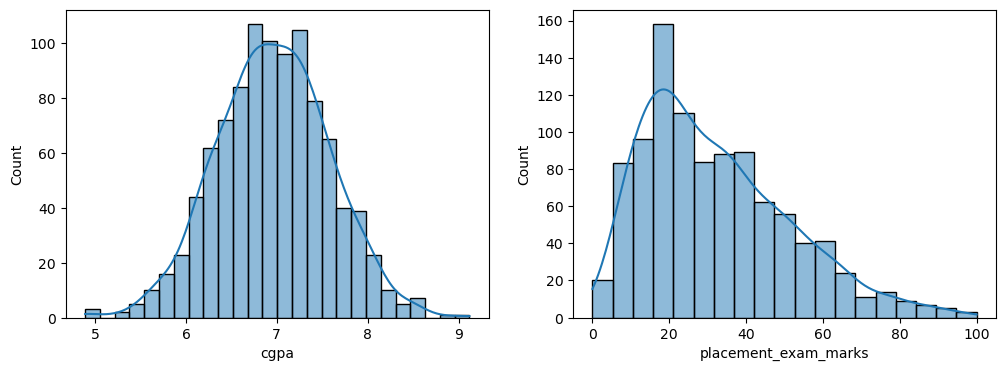

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

In [17]:
df['cgpa'].skew()

-0.014529938929314918

## Trimming generally

generally in normal distribution 99.7% of the data is present within the 3 standard deviations from the MEAN, hence remaining values which are outside of that is considered to be outliers

so we are considering the values only which are in the range of (μ-3σ, μ+3σ)

In [20]:
low = df['cgpa'].mean() - 3*(df['cgpa'].std())

In [21]:
low

5.113546374602832

In [22]:
high = df['cgpa'].mean() + 3*(df['cgpa'].std())

In [23]:
high

8.808933625397168

In [30]:
df[(df['cgpa'] > low) & (df['cgpa'] < high)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Z_score Trimming

Trimming is removing the entire column which contains outliers

In [46]:
# calculate the z_score for the cgpa column

df['z_score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [47]:
# now remove the rows which have the z_score of less than -3 and greater than 3 and store it in new variable

new_df = df[(df['z_score'] > -3) & (df['z_score'] < 3)]

In [48]:
# the shape of the dataframe is changed or reduces by 5 rows which are considered as outliers
new_df.shape

(995, 4)

## Z_score Capping

Capping involves setting a threshold beyond which any data point that surpasses it is replaced or "capped" at that threshold value.

For example, if you have a dataset where most values range from 0 to 100, but there are a few extreme values like 1000, 2000, etc., you might decide to cap these extreme values at, say, 200. This means that any value above 200 would be replaced with 200.

In [50]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [52]:
upper_limit

8.808933625397168

In [53]:
lower_limit

5.113546374602832

In [51]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [54]:
# the shape of the dataframe remains same because we are removing any row but altering them

df.shape

(1000, 4)

In [55]:
# the min,max,count etc.. values changes when capping is done

df.describe()

,cgpa,placement_exam_marks,placed,z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
